In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [2]:
hf = h5py.File('gammaray_lab4.h5', 'r')

In [3]:
hf.keys()

<KeysViewHDF5 ['data']>

In [4]:
data = np.array(hf.get('data'))

In [5]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [6]:
hf.close()

$\textbf{Problem 1}$

In this problem we are looking at the data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 milliseconds, and is in an approximately 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.

As with most data, there are 'features.' Your lab instructor has helpfully incorporated the meta-data into your data file.

$\textbf{1)}$ Download the data from the course website (gammaray_lab4.h5), and import it into your working environment. The data has 4 columns and more than 25 million rows. The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts. Make a few plots, generally exploring your data and making sure you understand it. Give a high level description of the data features you see. Specifically comment on whether you see signal contamination in your data, and how you plan to build a background pdf().

Below, I will first explore the data as a function of time, with each of the respective parameters. (Count vs time, Longtidue vs time, Solar phase vs time). This should help better visualize the periodicity of the data, although note that the time graph is severely trimmed to better accentuate the shape of the periodicity (In reality, there is more than 25 million values, and the graphs are limited to 250,000). To construct a background pdf, I will approximate the shape of the exponential curve that is shown on the Particle count vs time graph below, with appropriate parameters.  

Text(0.5, 1.0, 'Particle count vs time')

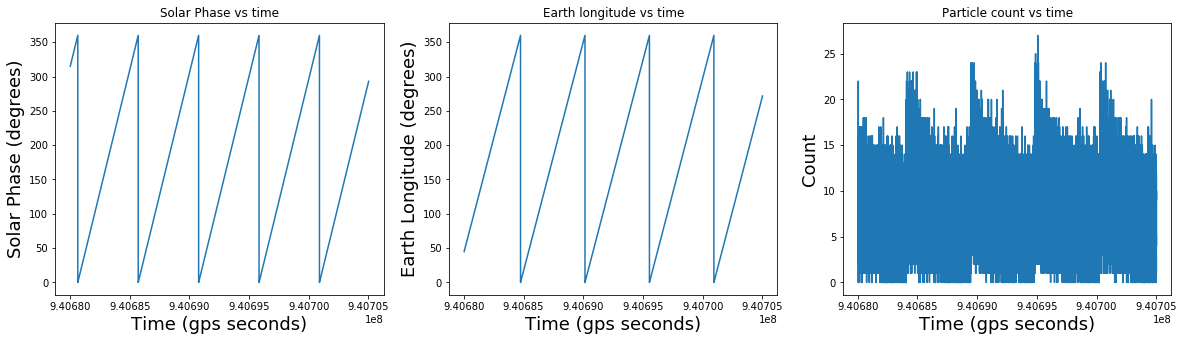

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))

ax[0].set_ylabel("Solar Phase (degrees)", fontsize = 18)
ax[0].set_xlabel("Time (gps seconds)", fontsize = 18)
ax[0].plot(data[0,:][0:250000],data[1,:][0:250000])
ax[0].set_title("Solar Phase vs time")

ax[1].set_ylabel("Earth Longitude (degrees)", fontsize = 18)
ax[1].set_xlabel("Time (gps seconds)", fontsize = 18)
ax[1].plot(data[0,:][0:250000],data[2,:][0:250000])
ax[1].set_title("Earth longitude vs time")

ax[2].set_ylabel("Count", fontsize = 18)
ax[2].set_xlabel("Time (gps seconds)", fontsize = 18)
ax[2].plot(data[0,:][0:250000],data[3,:][0:250000])
ax[2].set_title("Particle count vs time")


Below is a series of 2d histograms, depicting Count vs the different variables (Solar Phase, Time, and Earth Longitude). This gives us a good idea of the shape of the probability density for our particle count measurements, and how they change relative to the other variables. The discontinuity that happens at around 315 degrees on Earth Longitude is particularly interesting - We can see this familiar shape in the above image of Count vs time (affirming our earlier assumptions about the periodicity being the result of our satellite orbit, since the discontinuity occurs at a distinct Earth Longitude value). 

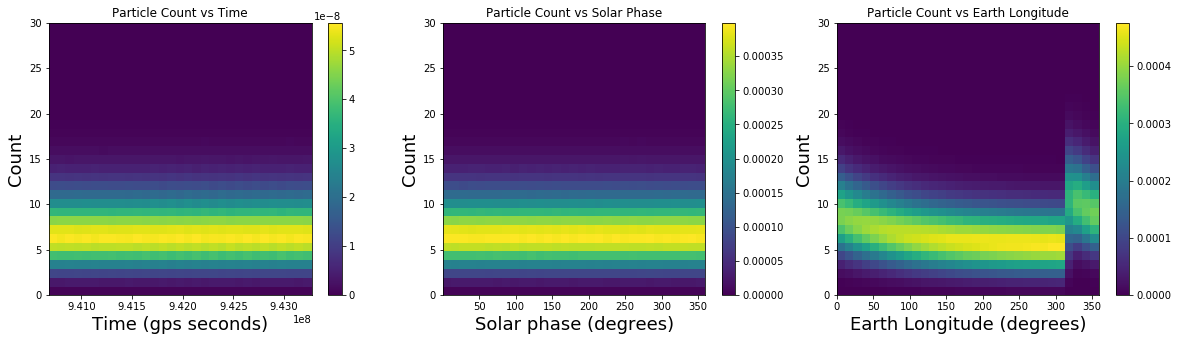

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_ylabel("Count", fontsize = 18)
ax[0].set_xlabel("Time (gps seconds)", fontsize = 18)
ax[0].set_title("Particle Count vs Time")
#plt.title("2D density histogram of Count vs Time", fontsize=20)
a = np.vstack((data[0], data[3]))
h = ax[0].hist2d(a[0,:],a[1,:],bins=31, density=True);
clb = plt.colorbar(h[3], ax=ax[0])

ax[1].set_ylabel("Count", fontsize = 18)
ax[1].set_xlabel("Solar phase (degrees)", fontsize = 18)
ax[1].set_title("Particle Count vs Solar Phase")
#plt.title("2D density histogram of Count vs Solar Phase", fontsize=20)
a = np.vstack((data[1], data[3]))
h = ax[1].hist2d(a[0,:],a[1,:],bins=31, density=True);
clb = plt.colorbar(h[3], ax=ax[1])

ax[2].set_ylabel("Count", fontsize = 18)
ax[2].set_xlabel("Earth Longitude (degrees)", fontsize = 18)
ax[2].set_title("Particle Count vs Earth Longitude")
#plt.title("2D density histogram of Count vs Earth Longitude", fontsize=20)
a = np.vstack((data[2], data[3]))
h = ax[2].hist2d(a[0,:],a[1,:],bins=31, density=True);
clb = plt.colorbar(h[3], ax=ax[2])

When looking at the particle data, we find that it looks very similar to a Poisson distribution. As shown below, a Poisson distribution with a mean slightly higher than the mean of our particle count data is a pretty good fit for our particle count data. Note that +0.7 was chosen arbitarily, because it makes a better fit than a shape parameter exactly equal to the mean.

In [9]:
mean = np.mean(data[3])
print(mean)

7.09730524315952


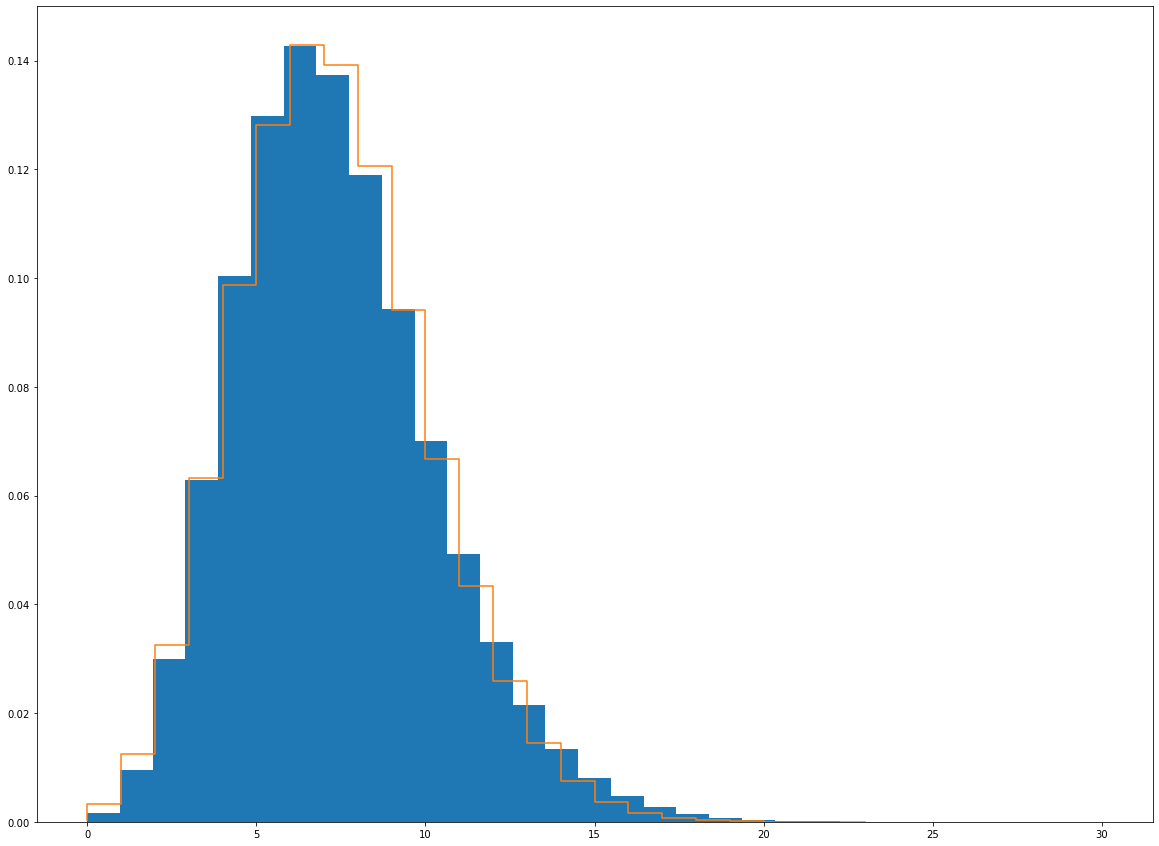

In [10]:
fig, ax = plt.subplots(1, 1)
ax.hist(data[3], bins = 31, density = True)
x = np.arange(stats.poisson.ppf(0.000001, mean + 0.7),
              stats.poisson.ppf(0.999999, mean + 0.7)) 
ax.step(x, stats.poisson.pmf(x, mean + 0.7))

$\textbf{2)}$ The background is not consistent across the dataset. Find and describe as accurately as you can how the background changes.

As shown in the Earth Longitude & Solar Phase vs Time graphs above, there is an apparent periodicity in the data of around $(9.40695-9.40690)*(1e8) \approx 5000$ seconds or so. As stated in the problem, the Satellite collecting these measurements has an orbit of about 90 minutes (5400 seconds). As such, we can conclude that the periodicity in the data is a direct consequence of this orbital period. By looking at the graph of Count vs Time, we can see that the values of our data points rapidly increases over a very short timescale, and then decays  before spiking back up. (The previous graph is repeated for reference, below.)

Text(0.5, 1.0, 'Particle count vs time')

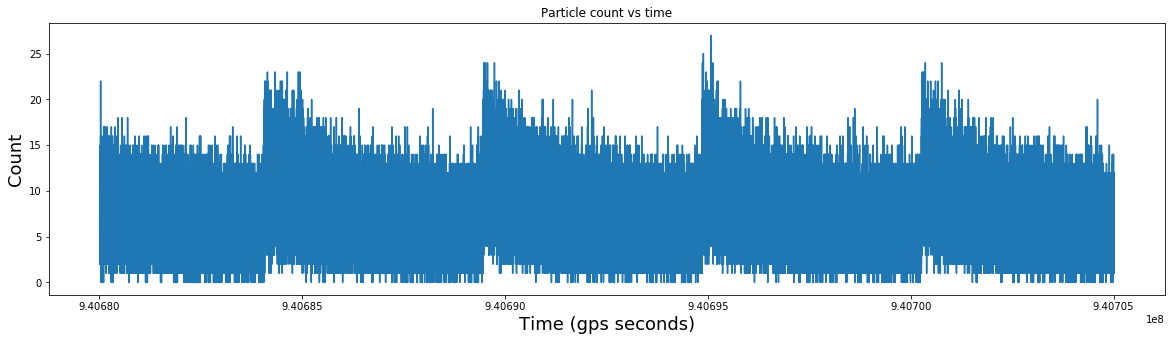

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
ax.set_ylabel("Count", fontsize = 18)
ax.set_xlabel("Time (gps seconds)", fontsize = 18)
ax.plot(data[0,:][0:250000],data[3,:][0:250000])
ax.set_title("Particle count vs time")

$\textbf{3)}$ Create a model for the background that includes time dependence, and explicitly compare your model to the data. How good is your model of the background?

Below, I'll attempt to fit a distribution to our background for both the anomalous region starting at around 315, and for the region outside of that range.

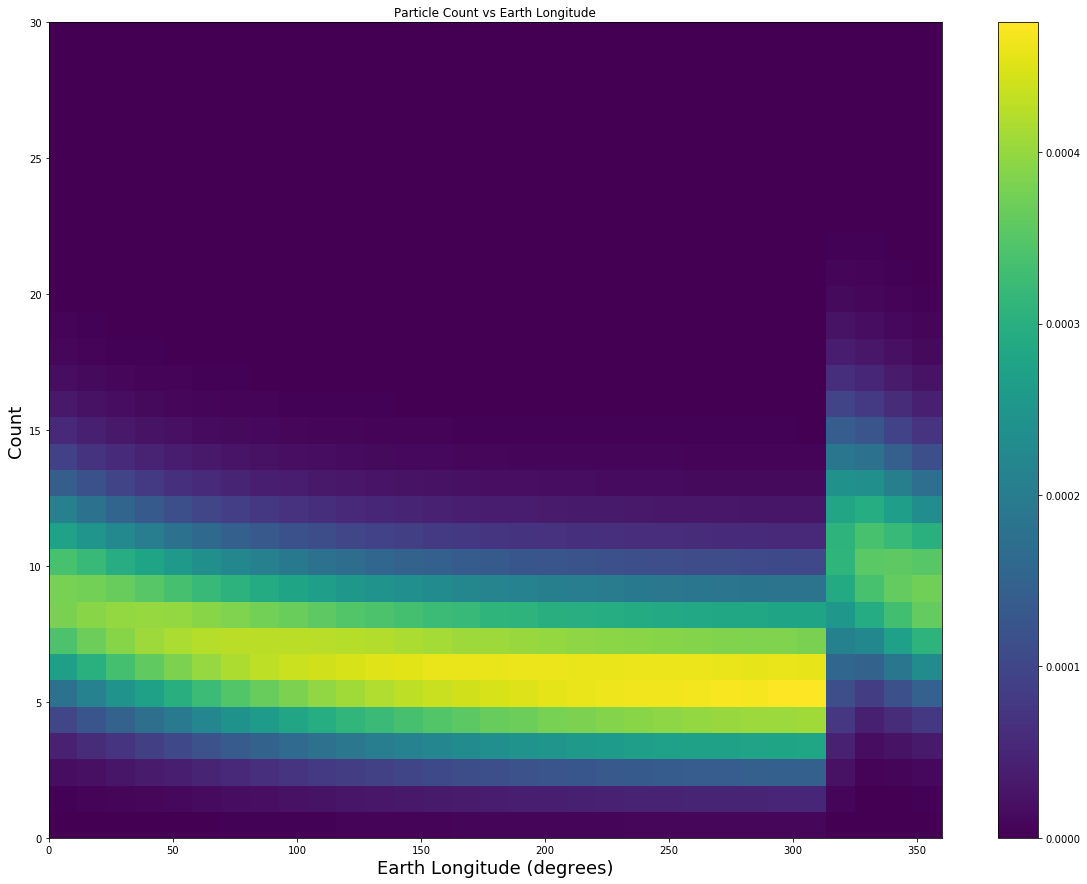

In [12]:
fig, ax = plt.subplots(1, 1)
ax.set_ylabel("Count", fontsize = 18)
ax.set_xlabel("Earth Longitude (degrees)", fontsize = 18)
ax.set_title("Particle Count vs Earth Longitude")
#plt.title("2D density histogram of Count vs Earth Longitude", fontsize=20)
a = np.vstack((data[2], data[3]))
h = ax.hist2d(a[0,:],a[1,:],bins=31, density=True);
clb = plt.colorbar(h[3], ax=ax)

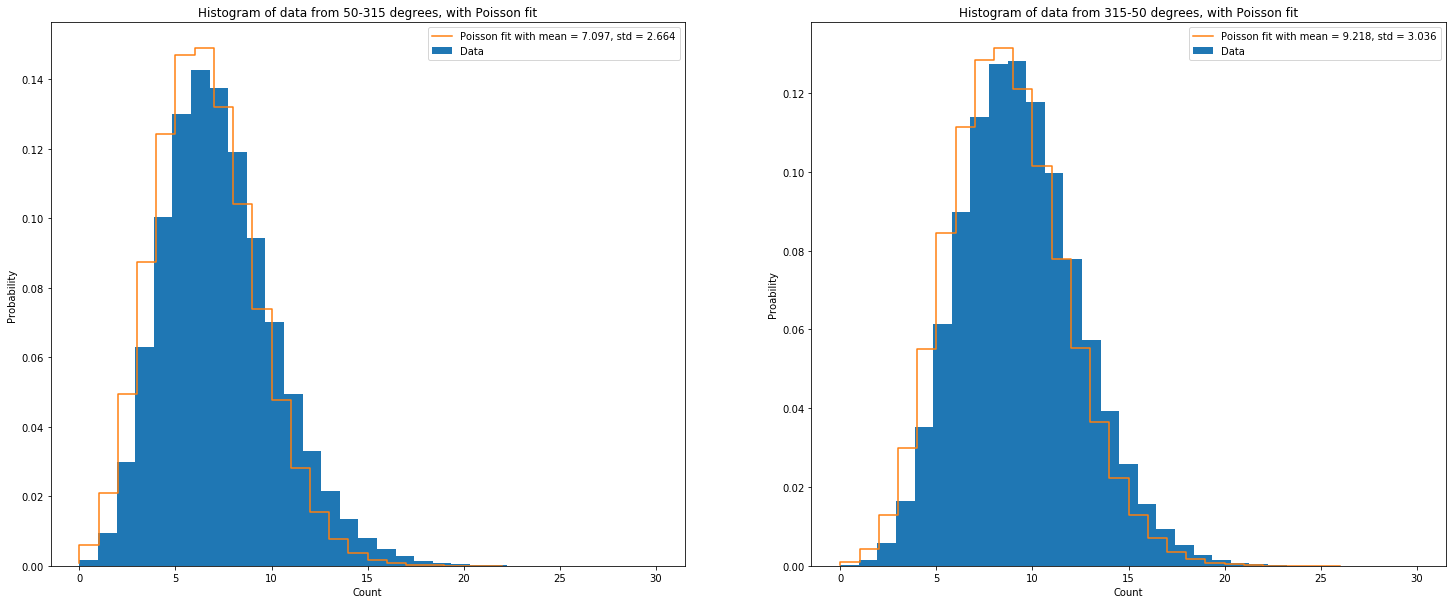

In [85]:
#50 chosen arbitarily, as it seems to be around the region where the anomaly starts to become not as defined.
#I just realized below that I used invert twice on two filters instead of using the right filter for each, but I 
#don't want to mess with it any more so I'm just going to leave it
fig, ax = plt.subplots(1, 2, figsize = (25, 10))
filter = (data[2] <= 50) & (data[2] >= 315)
anom_filter = (data[2] > 50) & (data[2] < 315)
norm_time = data[0][np.invert(filter)]
norm_data = data[3][np.invert(filter)]
anomalous_time = data[0][np.invert(anom_filter)]
anomalous_data = data[3][np.invert(anom_filter)]

ax[0].hist(norm_data, bins = 31, density = True)
mu = np.mean(norm_data)
x = np.arange(stats.poisson.ppf(0.000001, mu),
              stats.poisson.ppf(0.999999, mu)) 
ax[0].step(x, stats.poisson.pmf(x, mu))

ax[1].hist(anomalous_data, bins = 31, density = True)
mu2 = np.mean(anomalous_data)
x2 = np.arange(stats.poisson.ppf(0.000001, mu2),
              stats.poisson.ppf(0.999999, mu2)) 
ax[1].step(x2, stats.poisson.pmf(x2, mu2))

ax[0].set_xlabel("Count")
ax[1].set_xlabel("Count")
ax[0].set_ylabel("Probability")
ax[1].set_ylabel("Proability")
std_norm = stats.poisson.std(mu)
std_anom = stats.poisson.std(mu2)
ax[0].set_title("Histogram of data from 50-315 degrees, with Poisson fit")
ax[1].set_title("Histogram of data from 315-50 degrees, with Poisson fit")
ax[0].legend([f"Poisson fit with mean = {mu.round(3)}, std = {std_norm.round(3)}", 'Data' ])
ax[1].legend([f"Poisson fit with mean = {mu2.round(3)}, std = {std_anom.round(3)}", 'Data' ])

Above, the parameters for two different poisson distributions that fit our data are given. The first fit and dataset is for the region 50-315 degrees, and the second fit and dataset represents the region that starts with a discontinutity at 315 degrees, and continues to ~50 degrees or so. Note that the 50 degrees was chosen arbitrarily, as a way to simply distinguish the two regions instead of having a jarring approximation that includes both regions (which can become muddled due to the big jump at 315 degrees). The model is a fairly good fit, although given the arbitrarily selection of 50 degrees being the cutoff between the two regions, it's not exactly ideal. However, I found that it was the best way to provide a clear fit, as I could not find an elloquent way to come up with a model that has a big jump at a fixed period without it messing up the fit beyond recognition.

$\textbf{4)}$ Because the background varies, your discovery sensitivity threshold (how many particles you would need to see) also varies. What is the '5-sigma' threshold for a 100 millisecond GRB at different times?

At different times here really just means at different phases of the fit of the data, since it is clear that the data follows a repeating pattern as the satellite orbits. So, rather than thinking of it as time dependent, it can be simpler to think of it as simply being phase dependent, which directly relates to the periodicity of the orbiting satellite taking the measurements. Below is a series of 5-sigma values at different values of Earth longitude!

In [86]:
prob = stats.norm.cdf(5)
sigma = stats.poisson.ppf(prob, mean)
mean = np.mean(data[3,:][200:300])
phase_mean = np.mean(data[2][200:300])
threshold = stats.poisson.ppf(prob, mean)
print("The 5 sigma threshold at " + str(round(phase_mean, 2)) + " degrees is " + str(threshold))

The 5 sigma threshold at 46.66 degrees is 25.0


In [87]:
prob = stats.norm.cdf(5)
sigma = stats.poisson.ppf(prob, mean)
mean = np.mean(data[3,:][17500:17600])
phase_mean = np.mean(data[2][17500:17600])
threshold = stats.poisson.ppf(prob, mean)
print("The 5 sigma threshold at " + str(round(phase_mean, 2)) + " degrees is " + str(threshold))

The 5 sigma threshold at 162.0 degrees is 22.0


In [88]:
prob = stats.norm.cdf(5)
sigma = stats.poisson.ppf(prob, mean)
mean = np.mean(data[3,:][5628300:5628400])
phase_mean = np.mean(data[2][5628300:5628400])
threshold = stats.poisson.ppf(prob, mean)
print("The 5 sigma threshold at " + str(round(phase_mean, 2)) + " degrees is " + str(threshold))

The 5 sigma threshold at 127.33 degrees is 23.0


In [89]:
prob = stats.norm.cdf(5)
sigma = stats.poisson.ppf(prob, mean)
mean = np.mean(data[3,:][5926300:5926400])
phase_mean = np.mean(data[2][5926300:5926400])
threshold = stats.poisson.ppf(prob, mean)
print("The 5 sigma threshold at " + str(round(phase_mean, 2)) + " degrees is " + str(threshold))

The 5 sigma threshold at 314.0 degrees is 21.0


In [90]:
prob = stats.norm.cdf(5)
sigma = stats.poisson.ppf(prob, mean)
mean = np.mean(data[3,:][5926500:5926600])
phase_mean = np.mean(data[2][5926500:5926600])
threshold = stats.poisson.ppf(prob, mean)
print("The 5 sigma threshold at " + str(round(phase_mean, 2)) + " degrees is " + str(threshold))

The 5 sigma threshold at 315.33 degrees is 32.0


In [91]:
prob = stats.norm.cdf(5)
sigma = stats.poisson.ppf(prob, mean)
mean = np.mean(data[3,:][5931800:5931900])
phase_mean = np.mean(data[2][5931800:5931900])
threshold = stats.poisson.ppf(prob, mean)
print("The 5 sigma threshold at " + str(round(phase_mean, 2)) + " degrees is " + str(threshold))

The 5 sigma threshold at 350.66 degrees is 28.0


We can therefore see that the 5-sigma threshold decreases gradually, before spiking back up around the aforementioned 315 degree discontinuity point, before dropping back down! This is consistent with the behavior we see on the graphs in the previous portions. 

$\textbf{Problem 2}$

$\textbf{1)}$ Dowload the data from images.h5. This is a stack of 10 square images, each 200 pixels on a side.


In [92]:
hf2 = h5py.File('images.h5', 'r')

In [93]:
hf2.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

$\textbf{2)}$ Explore the data. Is there signal contamination? Is the background time dependent? Is it consistent spatially? Develop a plan to calculate your background pdf().

In [94]:
data2 = np.array(hf2.get('imagestack'))

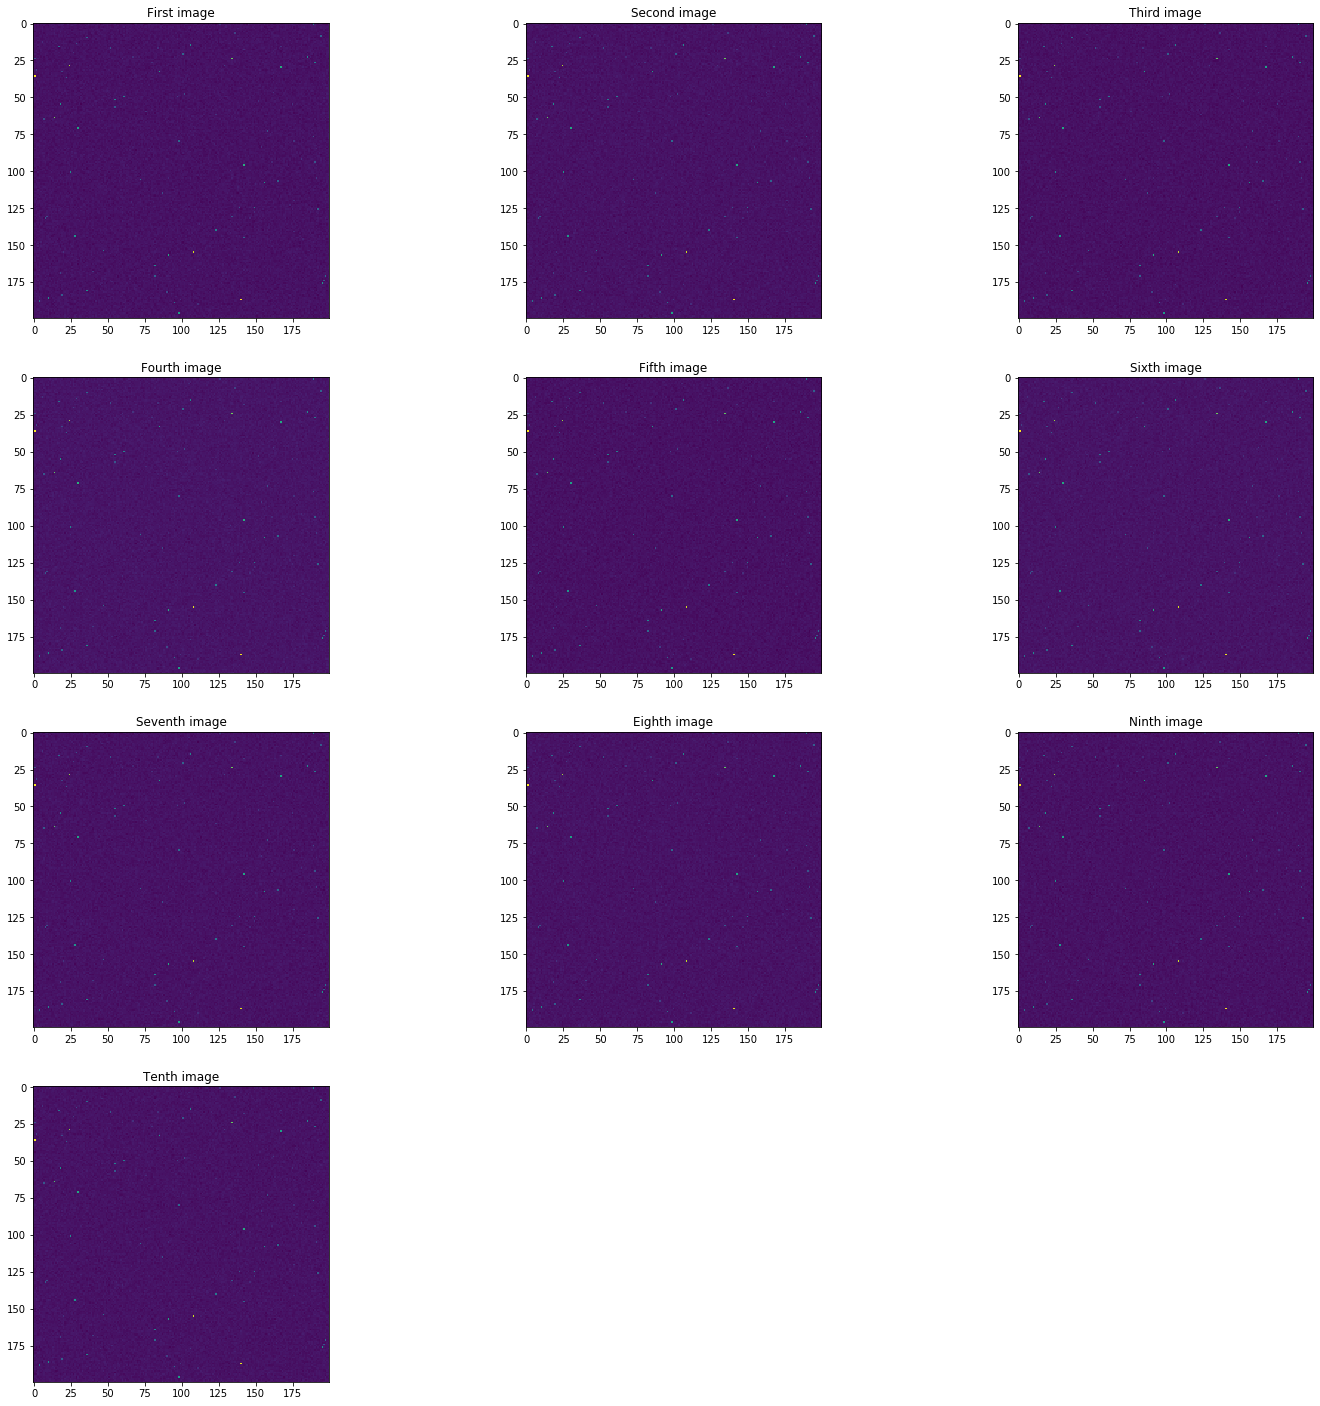

In [95]:
fig, ax = plt.subplots(4, 3, figsize = (25,25))
#a = np.vstack((data2[0], data2[0]))
#h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
#clb = plt.colorbar(h[3], ax=ax[0][0])
#clb.ax.set_title('probability')
ax[0][0].imshow(data2[:,:,0])
ax[0][0].set_title("First image")
ax[0][1].imshow(data2[:,:,1])
ax[0][1].set_title("Second image")
ax[0][2].imshow(data2[:,:,2])
ax[0][2].set_title("Third image")
ax[1][0].imshow(data2[:,:,3])
ax[1][0].set_title("Fourth image")
ax[1][1].imshow(data2[:,:,4])
ax[1][1].set_title("Fifth image")
ax[1][2].imshow(data2[:,:,5])
ax[1][2].set_title("Sixth image")
ax[2][0].imshow(data2[:,:,6])
ax[2][0].set_title("Seventh image")
ax[2][1].imshow(data2[:,:,7])
ax[2][1].set_title("Eighth image")
ax[2][2].imshow(data2[:,:,8])
ax[2][2].set_title("Ninth image")
ax[3][0].imshow(data2[:,:,9])
ax[3][0].set_title("Tenth image")
fig.delaxes(ax[3][1])
fig.delaxes(ax[3][2])

The fit of our background roughly follows a Gaussian normal distribution of mean -0.0032 and standard deviation 0.5616


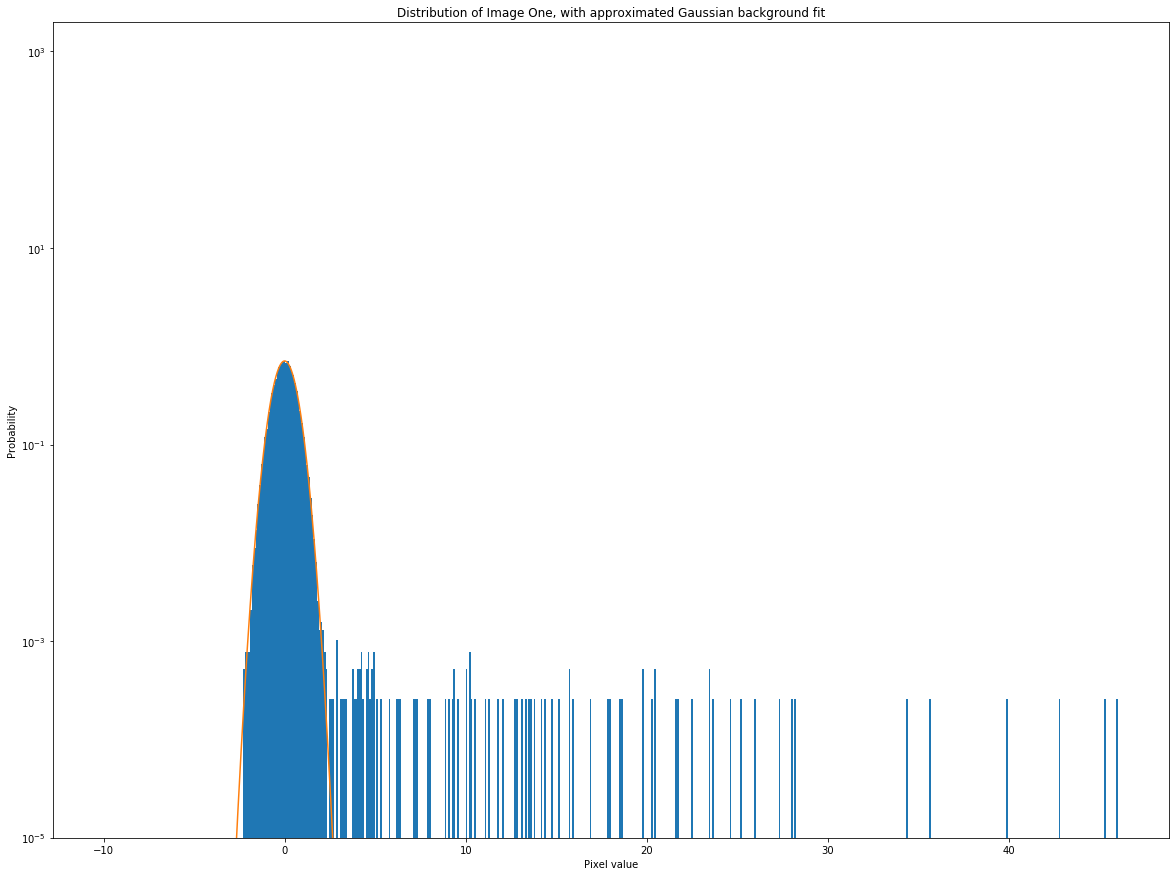

In [96]:
fig, ax = plt.subplots(1, 1)
ax.hist(data2[:, :, 0].flatten(), bins = 500, density = True)
ax.set_yscale('log')
threshold = data2[:, :, 0].flatten()[data2[:, :, 0].flatten() < 2]
x = np.linspace(-10, 10, 10000)
ax.plot(x, stats.norm.pdf(x, np.mean(threshold), np.std(threshold)))
ax.set_ylim(1e-5)
ax.set_xlabel("Pixel value")
ax.set_ylabel("Probability")
ax.set_title("Distribution of Image One, with approximated Gaussian background fit")
print("The fit of our background roughly follows a Gaussian normal distribution of mean " + str(np.round(np.mean(threshold), 4)) + " and standard deviation " + str(np.round(np.std(threshold), 4)))


We can see a little bit of signal contamination in the above image, specifically where the probability slightly increases for the data outside of our Gaussian fit. (For example, in the region around a value of ~10 there are 3 anomalously high probabilities, likely a product of signal contamination). In regards to the time continuity of the background, we can assume here that it is not time dependent since all of the pixels were taken at the same time, and we lack the critical information regarding the time interval between successive images. Below, we will examine the spatial dependence of our background.

Text(0.5, 1.0, 'Sum of Measurements vs pixel')

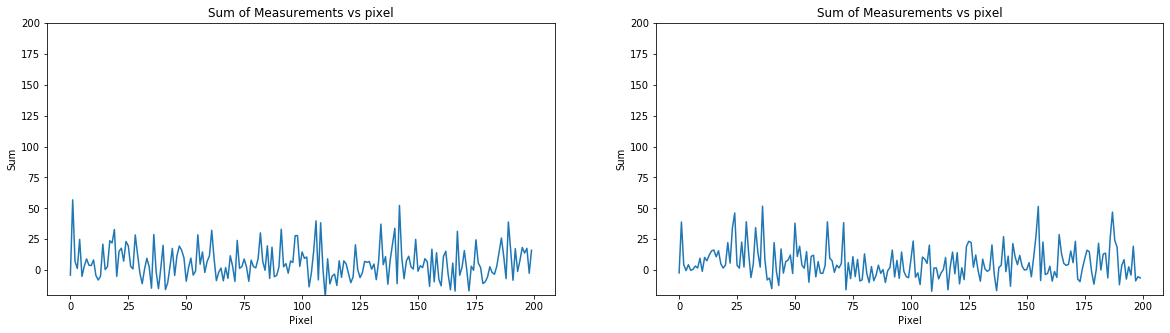

In [97]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ax[0].plot(np.arange(0, 200), np.sum(data2[:, :, 0], 0))
ax[1].plot(np.arange(0, 200), np.sum(data2[:, :, 0], 1))
ax[0].set_ylim(-20, 200)
ax[1].set_ylim(-20, 200)
ax[0].set_xlabel("Pixel")
ax[0].set_ylabel("Sum")
ax[1].set_xlabel("Pixel")
ax[1].set_ylabel("Sum")
ax[0].set_title("Sum of Measurements vs pixel")
ax[1].set_title("Sum of Measurements vs pixel")

As we can see here, the image 1 measurements are fairly evenly distributed since the sum of the rows and columns of our data is relatively constant. As such, we can confirm that it is fairly consistent spatially!

$\textbf{3)}$ Using your background distribution, hunt for your signal (either faint stars, or a transient). Describe what you find.

Unfortunately, I am severely stuck on the implementation of this part of Problem 2. A good way to isolate transient variables would be to use second order difference images, i.e taking a difference image of two consecutive frames, and then taking the difference between those two images. For example, to look for transient signals on Image 3, looking at 2 * image 3 - image 4 - image 2 should isolate any transient variables. However, I've tried many different ways to implement this, and I can't get the code to compile. However, the methodology should work, as isolating transients should be as easy as simply seeing if a pixel drastically changes in value between succcessive frames.

$\textbf{4)}$ You and your lab partner had different pdf(), but were using the same data. Explore why this is.

Even though we are using the same data, my lab partner is attempting to isolate a background that he can use to isolate the faintest stars, while my background should help me isolate distinct changes between different images in order to highlight transient variables. So, if I was able to implement properly, we should have different final pdfs because we are interested in different regions of the background for our detections.